In [1]:
import requests
import zipfile
import io
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations


# Set options to visualize all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# URL of the zip file you want to download
benefits_url = "https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2009_Beneficiary_Summary_File_Sample_20.zip"
benefits_root = 'benefits'
benefits_filename = 'benefits'

claims_url = 'https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2008_to_2010_Outpatient_Claims_Sample_20.zip'
claims_root = 'claims'
claims_filename = 'claims'

In [2]:
# KEEP_DESYNPUF_ID = [
#     '000002F7E0A96C32', '00001C24EE7B06AC', '000072CF62193213', '0000DCD33779ED8A', '0000F1EB530967F3', '0001B495F55E2DFA', '00028CFDA8612B87', '00036DA073115F08', '0003A64D9776B051', '0003D0FBC87B8600', '00041F0F6A16C8BC', '0004AA415F63AAD4', '000547C36E8CD98B', '0005DC61AE6B6793', '0006740E4B562994', '00067EFCDBCDB739', '0006DA46EAF50BD5', '0007812AB28F347D', '0007BCAB2B249D44', '000808E3D8E20DF4', '000836756946F79D', '00084778C234B1D6', '000971F1D4588A28', '000994C65A0D1143', '000A0E0AAE75349C', '000D09D7D3AEF848', '000D0E8073CAEA44', '000DAAA45900EE70', '000DF30D3DE7AAE8', '000E1BBF0E7CFF9F', '000E4502F65E15FE', '000E88D0D98DA2AE', '000E907BFDE18C6A', '000F7A6AEEFDCC55', '000FA3374E06ED02', '0010191C5983C0F7', '0010240F126BB58F', '0010C75A16A43AF5', '00115772FED581FA', '00122E1EA30E2736', '001235A6597F9E4C', '0013A870AC3E4816', '00147B4EFBD3CF23', '00159096DFF288F8', '00159898345AC40A', '00160173ACC2DD29', '00161946CCD942B9', '001639B04C05E86A', '001672EB78129C56', '001797F3EF168822', '0017B6E4B8CBC0F8', '00184DF89AA6A17E', '0018A9294B56DD23', '001A0F60D15EFA55', '001AF2ED659BF2C3', '001B7D5014A34CA5', '001B839690DBC6BF', '001BF2B465DFE0E1', '001C4F363FEF226C', '001C63F070951019', '001C745A3F038495', '001CD5531A8E3BF8', '001D1D7948B1B70B', '001D3404E540D6B6', '001D48B169089BD1', '001EC02CDB249A77', '001FB46FDB4340E9', '001FDCE2AEBDFDC5', '00202D697546D75D', '0020487AC39B102B', '00207AABC1793787', '0021C18B3A90DFDC', '00220624C5C73D2E', '00222C11D877A25F', '0022316B8AD0A06A', '0022A420A3280296', '002378B7D724A18E', '00239C3480B90173', '002491644922A93F', '0025122E06A9CE59', '0027132C6C1B8995', '002742C2CBC0847E', '002762E2ADD8036F', '002780127C56CA82', '0027C533C7F2095A', '002858DB115610C7', '002A1E97088C3283', '002AB16DF304CDFE', '002AE315B51D77F5', '002DB89EB70787B4', '002E0BEF43E8F9AD', '002F2C610B0D9B72', '002F732583E24704', '003084AFFCC3B384', '0031592E3888AFB5', '0031FC7FB5F8EC2B', '00334870CFE4D153', '003371718597E5A0', '00346D0B4929A9C0', '00349CACA4BBF6B9', '00360668EBE55A1C', '003647DB41CAD242', '003752689216F837', '00378E44ADED3308', '003793B108716D04', '00382D2FFE22E8FC', '00387D6181F78289', '0038F7A16E3F6B9D', '0038FF99C9FC3773', '00395F1B4131E3FA', '003A3185DDAAC855', '003B46025FF2CD87', '003BEDBF1474BD28', '003C3CCA33D9C652', '003C48E2B24F047E', '003D5B2E0621D0EB', '003D6EE4FED440AE', '003D9BAA03DB678C', '003EC8E402A5D39C', '003EDB91A35720A6', '004172AFE2BBA774', '00418F54E59CD8F6', '00436E93FD39CF5B', '00459E4DA3EF848F', '0045AC0610B72CAA', '00477DEE574305CA', '004880FF89BEB892', '004A5EBFDC3B8C89', '004B5C37EB9D5637', '004B6215B8CABC74', '004D592ACFE20DC7', '004D8FAFE7FB1897', '004DADCF954A7D8A', '004DFADC8DFA28D2', '004E815E2D38A1C7', '004F07AE92E1C120', '004FA7ACC51C50FF', '004FCC52DE195CA0', '00503627A100A75E', '00506191BAE3FC4B', '0050D66259ADF7AC', '0050DEF2A368C479', '0050EECC80CF28FA', '005117AD74C3CC14', '005187E7CFFACB8A', '005264359FBCC2AA', '00537A1C5B5FB886', '00539E095CB3CD42', '00542B5BA3A6557B', '00551417DC1145BA', '00559EB3E026B376', '005610B8AB8150F5', '005652635DA1F8DE', '005864E2D8FAFC4B', '0058BEC2E5EFFA30', '0058D11016171989', '005961E20CF8266A', '005A411F2AB20CB3', '005A80B132979947', '005ABCF185FD9115', '005CD43E29C9680D', '005D2D98523D0721', '005E88BA9F55511D', '005EC236B09272D8', '005F72796FA53436', '005FE6ED971CD33A', '005FF5319651F1C9', '0060F1EE7EBFEA24', '0061950E3349E0CF', '006228333B6DA1A7', '006269D319FE0DFF', '0062E6414457A873', '00631FA70F529B99', '00635ED54A3ADDB0', '0063C8A4368BB47C', '00650052945CA450', '006513A1A051F6E6', '00652FFE8B678543', '0065466A8C046D31', '00671BFDC3CB1D00', '006823719D9F2502', '00683431FFEDF1D5', '00685614E5A994BB', '006892A8B18F65B2', '0068D8C91A079C85', '0069E64C57A15880', '006A2F89F34E6287', '006A3CAEEDFD6984', '006A5112CD2EEE73', '006C859A7977FF18', '006D71E3DB987A53', '006D8A86F30EC69F', '006DC5AEF70FBFFE', '006EA441B43FC63D', '006EC64DA75312FA', '006F0EF0197B4EFE', '006F5A783338EFD7', '006F75EDE6F726E0', '007054AB1D862E98', '0070CCD4A6B6D211', '007160474653F4C2', '00717A16774E7A67', '0072136521355AF5', '00739C7F1CCDBC0A', '0073D4294585BB45', '00747E640509BCB9', '0074A64E6BF322F9', '00756B76AFF3CE21', '00775F807BE33656', '007767C2D43672F8', '00779C325A271623', '00781C6BEDC4B40F', '0078920368CA9E1E', '00790B09BAD6FFC1', '00796A9111E4D5C7', '0079CA2F86351F98', '007A6B8AF623C775', '007ABD65D4F2CC7B', '007AD2442303B196', '007CFB79B6871A0D', '007DEDD1EADA715C', '007EB966757D9D96', '007F0EC06F901298', '007F709F53B607C6', '007FB13BC490DA91', '008018655E91CCC5', '008033E5F6C786BC', '00808FFDCDB7168F', '00813EE66BA6D2FB', '00820EFDF9A935FA', '00829546ABB7325D', '00829C74F5F4BDB8', '0082D2FA474BFE71', '0082DA6D52930A1E', '00830711C28E6491', '00832ACED3FEB04B', '0083AE6E975B4ADF', '0085280654AD8AD4', '008685B434B5F7D7', '00869806016F64C2', '008726744AD0F3C5', '008785A78C5E02B2', '0087BBE959CACF11', '0087D892076B9123', '0087F511799CF398', '00880EEB9F81DAD5', '0088602480B4F770', '0088A210FAA16B9A', '0089012F8B863EDB', '00899D2D16953A5E', '0089CC755B892CD3', '008A95805F407126', '008C652085987E73', '008C847A705547DC', '008D259B6AA5231F', '008D5B71B96C9065', '008F37DA385CBAAC', '008FA49764362145', '009052CC5EAAE0C1', '0090F7FC70D298AD', '009222ECB4518512', '00932B9C853108D0', '009398AB46D88086', '0093DCFEDAA57240', '00947A859C2D0A06', '00952292DC284E1B', '0095C6431C0526CA', '0096F3772753E36B', '00976B55B6558DF4', '0098C3710270A9D5', '009928D67AAC0421', '0099C1EC305138BF', '0099FFED3C9BA5B5', '009B232281B1CC7A', '009B837C27F48AE4', '009BB0B2056AC2A6', '009C12A60C9FB7C2', '009C180B3E8D5B43', '009C4CC5DF10A25F', '009C5B024DB2FC74', '009D19C94C6942B4', '009D3C6A553F229A', '009DE5220AB31E5D', '009EAB0DCB56C536', '009EB1E2F78C30A8', '009F62EC2D9A755A', '00A10FDB9F837342', '00A18D6BFFCED61E', '00A2408FBAFCD9B9', '00A29DD58A9DC3DA', '00A2F4F8117B388A', '00A3F2CE248E4DBF', '00A3FD0F81C9D621', '00A46665242ED92B', '00A47D1D5F478AB1', '00A495FF1B0EADED', '00A4A0D04892F0CC', '00A4A8A5DD5D6A45', '00A5D955F064EDA2', '00A608142FC01AF0', '00A6FA5BE6ABA84A', '00A7E0C3986303F5', '00A8FC99A021FEBD', '00A96166F61359B3', '00AA574D23C8E30C', '00AAA38E283545B1', '00AB82C6CD3DBABD', '00ABAA6DE851C0CA', '00ABDBD6CC92AE26', '00AC3ECF256EBA78', '00ACBBE04E3FCE97', '00AE4BCFB9861DCA', '00AF7AC7EE1C1C0D', '00AFA24375C23BF1', '00AFC4CB05EE519E', '00AFD3B4FCE859A1', '00AFDBEE6A48ECBD', '00B026C14BD6C4BC', '00B0820D090706DA', '00B0910229E02667', '00B1FF8178B8D8F9', '00B423E5D4ED215C', '00B4F72C52765F92', '00B52BA89C918F43', '00B5460BC380499D', '00B5A85F1A01A61C', '00B5BBCC6D92875C', '00B68408CB543783', '00B68D8B05AAFD08', '00B69AB111735D7D', '00B6DE80F9A8C706', '00B70543BA2BC822', '00B7C1C764297090', '00B85A6A4A66159D', '00B92BAB6CEEB8BF', '00B94F2B90D4BC30', '00B998679E1B562B', '00B9B727E0D3AAAC', '00BA305089C83DA2', '00BA4EE1B41AFA23', '00BAE7A198228028', '00BAEE0F708DB371', '00BB3462CB0B46C1', '00BB650314E9254F', '00BB794FD69EABEA', '00BD3236BA07AB51', '00BE3425D55460C9', '00BE41295C0D1A2C', '00BEE0A5B4B2C345', '00BF4BEB8A34A9BB', '00BF9F036F4700F2', '00C0135BCAC45CEF', '00C02E0104618B52', '00C0B2D323C2349D', '00C1C2ABA18836D2', '00C1F721E2CD09A4', '00C368D0BB2EE4BF', '00C5E002B8DF1D07', '00C5E74A15BEA82F', '00C5F19452593CD6', '00C62FC40D189C67', '00C6A75C4B231127', '00C72CE257BBA01E', '00C8AEE58958C195', '00C8F9D99BEE17E2', '00C952EEEACBC2B0', '00C9AA04934C404F', '00CA390E41F21006', '00CA87AF816786ED', '00CACC63DFA56660', '00CC3591D93882B2', '00CCFFC3AB6BFE54', '00CD0541FE79A249', '00CE4FF2DF87AA5F', '00CEE4E48AD8C99F', '00CF2728180E3A16', '00CF36EDF8685324', '00D07B24A2AF5742', '00D14D3039180B7A', '00D35E06DB83EB09', '00D39CDBE47FE789', '00D401552AA18A58', '00D4A36B7AE0F058', '00D597AF11132071', '00D5BFB3A25BE91B', '00D6FE25DB4A36CB', '00D7CEBC2670113B', '00D8370248C25DFA', '00D853408B0308AD', '00D9312D0EF8EA3B', '00D991A54421B5A5', '00D9DD3B4F38BCAD', '00DA0B200F14005D', '00DA486B066083FD', '00DB0F72321AF23F', '00DB5716DDFE2F10', '00DBFC23C63AEFA1', '00DC06056E0882A5', '00DC20B7C20BD844', '00DC7A197B15464A', '00DC89EA8C4179B1', '00DD04A75C665A6C', '00DEAFBF2C7AEA3B', '00DEDB781F13F050', '00DF30F3EFD56EEE', '00DFA60AC034938B', '00E0CF01F07F63AB', '00E10F65EC1F96BE', '00E12C96B2797E0B', '00E133B74653E72A', '00E168FCA43A201C', '00E1C40DBF877892', '00E1EFEC49E99496', '00E2E9945373C7AD', '00E387D697FB3651', '00E466268CA84BB7', '00E48150A9186A99', '00E4EEF0D428BA9A', '00E6B3CB4AFDE070', '00E6B8FED7AED81C', '00E6E4ED5D6477A6', '00E7B92D02C51821', '00E7CD587AE9DBA1', '00E7F34016E0FC95', '00E84A3F531FA6C3', '00E8925B26223BC6', '00E926170F0B1633', '00E95888DCB45A2B', '00E9F3DA2A169FBA', '00EA102CD816B43E', '00EA9C5281B9DC1C', '00EAD04666E1EBCC', '00EB31B2EBF15686', '00EB83C2CDB29D24', '00EBFEC06DF4D081', '00EC059ED7E1F5CF', '00EC2A4341F16236', '00EC7A932B8102D4', '00EC7FF988E6433A', '00ECF42A41001CD2', '00EDBB3763A612C2', '00EDD83DC2AD2E9E', '00EDDE7E21648E32', '00EDE44282984D5C', '00EE00028607E9B9', '00EE7C8FBBC4C7BA', '00EE8BD4FE668C43', '00EF2CAACBA66736', '00F0C6E06E9DF4E2', '00F13BB02920FBCF', '00F1AF4E7C3BAC51', '00F26EC9B4A2E0A8', '00F2878AD3DAB6EA', '00F2EECFFF9CCECB', '00F3998AC488AD1D', '00F4C03DBA6D0390', '00F5867BF8396AE6', '00F6ADC44E380435', '00F706AEA27DCBF1', '00F776AF5FBAA76D', '00F8D4BF94D989D0', '00F8E4CB34F64CF1', '00F9722684999382', '00F97AC19C1EA811', '00F97FFF809A4119', '00FAA002163A5004', '00FB9633E40D7010', '00FCF2CC7AE39B12', '00FD77482C2E8641', '00FDAB09DF3ABAAB', '00FDB3414218D5F7', '00FEAA0104EB38BD', '00FEE8ED43870DA6', '00FFD450BB17F3E5', '010099553293BB92', '0100B28125EF61C9', '0100E80676FFAEF6', '0101573ADDC1A014', '010239672D800E78', '010310D9E26A6608', '0103265E9E1DD967', '0105579FD940CC21', '01057C9E3A9158A1', '0106B1994E3C772D', '0106E4ED1DC8CE54', '0107C444FBDCECB7', '01081B06186F35BF', '010AB6E00E0CF441', '010B0E52A9277CB4', '010B8637C4967F02', '010B981EC2B124E7', '010C0DB565974B95', '010DB1305E601891', '010E073B60F22B74', '010F8BED882F2C18', '010FA66C4EA0D0F7', '01109E614D33C73F', '0110A746856A88A6', '0110FD1213103304', '011118A457E598DC', '0111C3C90E0C4292', '01148C8BC9897450', '011561A5DEC96D63', '011573A2E62A51F9', '01157908ACBC8CFC', '0116E49C86B2AA26', '01172473F9753DAD', '01188EF4B92F81B1', '01192E0DD07C2698', '011B0122EF244D5C'
# ]

KEEP_DESYNPUF_ID = []

#### Data Download

In [3]:
def download_data(data_url, data_root, data_filename):
  # Send an HTTP GET request to the URL
  response = requests.get(data_url)

  if response.status_code == 200:
      # Create a ZipFile object from the response content
      with zipfile.ZipFile(io.BytesIO(response.content), 'r') as zip_ref:
          # Specify the directory where you want to extract the contents
          extraction_path = f"/content/extracted_data/{data_root}"
          zip_ref.extractall(extraction_path)

          # List all files in the extraction directory
          extracted_files = os.listdir(extraction_path)

          # Check if there's only one file in the extraction directory
          if len(extracted_files) == 1:
              # Assuming it's the extracted CSV file, rename it as per user input
              extracted_csv_file = extracted_files[0]
              os.rename(os.path.join(extraction_path, extracted_csv_file), os.path.join(extraction_path, f"{data_filename}.csv"))
              print(f"Data has been downloaded, extracted, and saved as {data_filename}.csv")

              return os.path.join(extraction_path, f"{data_filename}.csv")
          else:
              print("Error: There should be exactly one file in the extraction directory.")
  else:
      print("Failed to download the data.")


benefits_path = download_data(benefits_url, benefits_root, benefits_filename)
claims_path = download_data(claims_url, claims_root, claims_filename)

Data has been downloaded, extracted, and saved as benefits.csv
Data has been downloaded, extracted, and saved as claims.csv


In [4]:
benefits_pdf_raw = pd.read_csv(benefits_path)

# Filter data to keep data size low
if len(KEEP_DESYNPUF_ID) > 0:
  benefits_pdf = benefits_pdf_raw[benefits_pdf_raw['DESYNPUF_ID'].isin(KEEP_DESYNPUF_ID)]
else:
  benefits_pdf = benefits_pdf_raw.copy()

benefits_pdf.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,000002F7E0A96C32,19190701,NaN,2,2,0,5,400,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00001C24EE7B06AC,19360501,NaN,1,1,0,11,530,12,12,0,12,2,2,2,2,2,2,2,1,2,2,2,0.0,0.0,0.0,200.0,40.0,0.0,800.0,260.0,0.0
2,000072CF62193213,19310401,NaN,2,1,0,34,120,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,130.0,70.0,0.0,440.0,30.0,50.0
3,0000DCD33779ED8A,19420501,NaN,2,2,0,11,190,12,12,0,12,1,1,2,1,2,2,2,2,2,2,2,0.0,0.0,0.0,90.0,20.0,0.0,930.0,200.0,0.0
4,0000F1EB530967F3,19350401,NaN,2,1,0,23,720,12,12,0,12,1,1,2,1,2,1,1,1,1,1,2,0.0,0.0,0.0,70.0,200.0,0.0,4950.0,1340.0,0.0


In [5]:
claims_pdf_raw = pd.read_csv(claims_path)

# Filter data to keep data size low
if len(KEEP_DESYNPUF_ID) > 0:
  claims_pdf = claims_pdf_raw[claims_pdf_raw['DESYNPUF_ID'].isin(KEEP_DESYNPUF_ID)]
else:
  claims_pdf = claims_pdf_raw.copy()

claims_pdf.head()

<ipython-input-5-7067e10f975d>:1: DtypeWarning: Columns (21,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  claims_pdf_raw = pd.read_csv(claims_path)


,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,OT_PHYSN_NPI,NCH_BENE_BLOOD_DDCTBL_LBLTY_AM,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,ICD9_DGNS_CD_9,ICD9_DGNS_CD_10,ICD9_PRCDR_CD_1,ICD9_PRCDR_CD_2,ICD9_PRCDR_CD_3,ICD9_PRCDR_CD_4,ICD9_PRCDR_CD_5,ICD9_PRCDR_CD_6,NCH_BENE_PTB_DDCTBL_AMT,NCH_BENE_PTB_COINSRNC_AMT,ADMTNG_ICD9_DGNS_CD,HCPCS_CD_1,HCPCS_CD_2,HCPCS_CD_3,HCPCS_CD_4,HCPCS_CD_5,HCPCS_CD_6,HCPCS_CD_7,HCPCS_CD_8,HCPCS_CD_9,HCPCS_CD_10,HCPCS_CD_11,HCPCS_CD_12,HCPCS_CD_13,HCPCS_CD_14,HCPCS_CD_15,HCPCS_CD_16,HCPCS_CD_17,HCPCS_CD_18,HCPCS_CD_19,HCPCS_CD_20,HCPCS_CD_21,HCPCS_CD_22,HCPCS_CD_23,HCPCS_CD_24,HCPCS_CD_25,HCPCS_CD_26,HCPCS_CD_27,HCPCS_CD_28,HCPCS_CD_29,HCPCS_CD_30,HCPCS_CD_31,HCPCS_CD_32,HCPCS_CD_33,HCPCS_CD_34,HCPCS_CD_35,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,00001C24EE7B06AC,684562269783396,1,20090404.0,20090404.0,1100SK,200.0,0.0,1.298827e+09,NaN,NaN,0.0,74560,V5861,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,40.0,NaN,93303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00001C24EE7B06AC,684012269893042,1,20100310.0,20100310.0,1100SK,500.0,0.0,1.298827e+09,NaN,NaN,0.0,7879,V4589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,74000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000072CF62193213,684012269540703,1,20080130.0,20080130.0,1000AH,50.0,0.0,8.929521e+09,NaN,8.523329e+09,0.0,4019,73300,79431,V5869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,80053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000072CF62193213,684472269696971,1,20080301.0,20080301.0,1000AH,70.0,0.0,8.382688e+09,NaN,NaN,0.0,4019,71699,V7644,78605,7226,V1582,43882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20.0,NaN,36415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000072CF62193213,684122269778934,1,20080322.0,20080322.0,3400HK,40.0,0.0,4.404237e+09,NaN,NaN,0.0,1736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10.0,1733,88305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Step 2: Basic Data Cleaning

In [6]:
# Define all columns related to chronic illness
chronic_illness_cols = [ 'SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR',
                        'SP_COPD', 'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT',
                        'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA']

# Define a function to combine chronic conditions
def create_combined_column(x):
    values = [col for col in chronic_illness_cols if x[col] == 1]
    sorted_values = sorted(values)  # Sort the values
    return ', '.join(sorted_values)

def count_conditions(x):
  return len(x.split(','))


# Convert values to Booleans (1 to True, 2 to False) for chronic illness columns
benefits_pdf['Chronic_Conditions'] = benefits_pdf.apply(create_combined_column, axis=1)

# Count the number of chronic conditions for each member
benefits_pdf['Condition_Count'] = benefits_pdf['Chronic_Conditions'].apply(count_conditions)

# Categorize members with 3 or more conditions as 'Multiple'
benefits_pdf['Chronic_Conditions_Type'] = benefits_pdf.apply(lambda row: 'Multiple' if row['Condition_Count'] >= 3 else 'LessThan3', axis=1)

In [7]:
master_pdf = benefits_pdf.merge(claims_pdf, how='left', on='DESYNPUF_ID')

#### Step 3: Basic Summaries

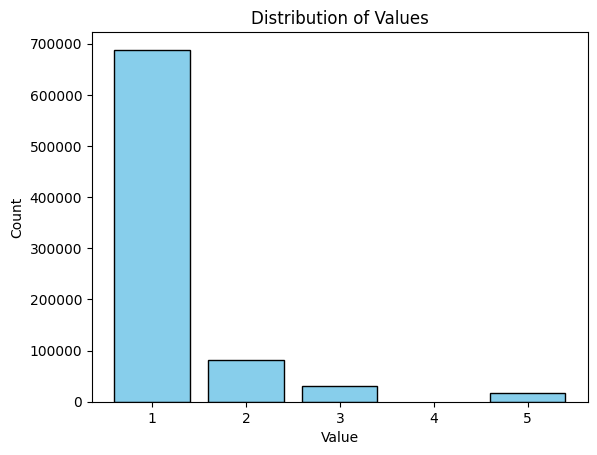

In [8]:
# 1 - What is the distribution of races?

# Count the occurrences of each value in the 'BENE_RACE_CD' column
value_counts = master_pdf['BENE_RACE_CD'].value_counts().sort_index()

# Create a bar chart
plt.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Distribution of Values')

# Show the plot
plt.show()

In [9]:
# 2 - What is the most common chronic illness combination?
all_chronic_conditions = master_pdf['Chronic_Conditions'].unique()

# Split each list element into constituent conditions and flatten the list
individual_conditions = [condition.strip() for combo in all_chronic_conditions for condition in combo.split(',')]

# Generate pairs of conditions
pairs = list(combinations(individual_conditions, 2))

# Normalize pairs to ensure consistent order (A-B and B-A are treated the same)
normalized_pairs = [tuple(sorted(pair)) for pair in pairs]

# Use Counter to count the occurrences of each pair
pair_counts = Counter(normalized_pairs)

# Filter out pairs where both elements are not blank and not the same
filtered_pairs = [(a, b, count) for (a, b), count in pair_counts.items() if a and b and a != b]

# Sort by count in descending order
filtered_pairs.sort(key=lambda x: x[2], reverse=True)

# Find the most common chronic condition pair
most_common_pair = Counter(filtered_pairs).most_common(1)

# Take the top 10 most common pairs
top_10_pairs = filtered_pairs[:10]

# Print the most common chronic condition pair and its count
print("Most Common Chronic Condition Pair:", '-'.join(most_common_pair[0][0][0:-1]))
print("Count:", most_common_pair[0][0][-1])
print('\n'*2)

print('Top 10 Most Common Chronic Condition Pairs: ')
# Print the top 10 most common chronic condition pairs and their counts
for idx, (condition1, condition2, count) in enumerate(top_10_pairs, start=1):
    print(f"{idx}. Pair: ({condition1}, {condition2}), Count: {count}")

Most Common Chronic Condition Pair: SP_DIABETES-SP_ISCHMCHT
Count: 811545



Top 10 Most Common Chronic Condition Pairs: 
1. Pair: (SP_DIABETES, SP_ISCHMCHT), Count: 811545
2. Pair: (SP_CHF, SP_ISCHMCHT), Count: 766612
3. Pair: (SP_CHF, SP_DIABETES), Count: 739860
4. Pair: (SP_ALZHDMTA, SP_ISCHMCHT), Count: 729932
5. Pair: (SP_DEPRESSN, SP_ISCHMCHT), Count: 722596
6. Pair: (SP_CHRNKIDN, SP_ISCHMCHT), Count: 712509
7. Pair: (SP_ALZHDMTA, SP_DIABETES), Count: 704460
8. Pair: (SP_ISCHMCHT, SP_OSTEOPRS), Count: 697837
9. Pair: (SP_DEPRESSN, SP_DIABETES), Count: 697380
10. Pair: (SP_ISCHMCHT, SP_RA_OA), Count: 687750


In [10]:
# Most Common Chronic Condition Combination

Counter(master_pdf[master_pdf['Chronic_Conditions'] != '']['Chronic_Conditions']).most_common(10)

[('SP_ISCHMCHT', 19995),
 ('SP_DIABETES, SP_ISCHMCHT', 14391),
 ('SP_CHF, SP_DIABETES, SP_ISCHMCHT', 12037),
 ('SP_DIABETES', 11386),
 ('SP_CHF, SP_ISCHMCHT', 9457),
 ('SP_CHF, SP_CHRNKIDN, SP_DIABETES, SP_ISCHMCHT', 9051),
 ('SP_ALZHDMTA, SP_CHF, SP_CHRNKIDN, SP_COPD, SP_DEPRESSN, SP_DIABETES, SP_ISCHMCHT',
  8124),
 ('SP_DEPRESSN', 7097),
 ('SP_DEPRESSN, SP_DIABETES, SP_ISCHMCHT', 6983),
 ('SP_ALZHDMTA, SP_CHF, SP_CHRNKIDN, SP_DEPRESSN, SP_DIABETES, SP_ISCHMCHT',
  6972)]

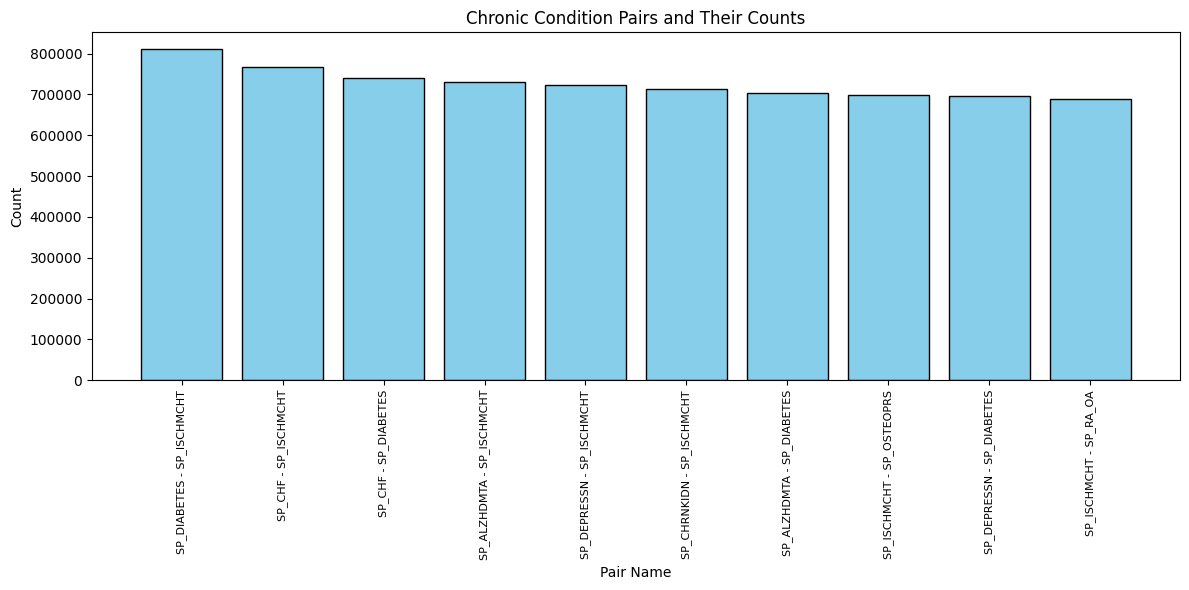

In [11]:
# Extract pair names and counts
pair_names = [f"{condition1} - {condition2}" for condition1, condition2, _ in top_10_pairs]
pair_counts = [count for _, _, count in top_10_pairs]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(pair_names, pair_counts, color='skyblue', edgecolor='black')
plt.xlabel('Pair Name')
plt.ylabel('Count')
plt.title('Chronic Condition Pairs and Their Counts')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
# 3 - Which chronic illness combination has the total highest cost?

# Group by combinations and sum payments
combination_totals = master_pdf[master_pdf['Chronic_Conditions'] != ''].groupby('Chronic_Conditions')['CLM_PMT_AMT'].sum()

# Find the combination with the highest total payment amount
highest_payment_combination = combination_totals.idxmax()

# Get the highest total payment amount
highest_payment_amount = combination_totals.max()

# Print the combination and its total payment amount
print("Combination with Highest Total Payment Amount:", highest_payment_combination)
print("Total Payment Amount for the Combination:", highest_payment_amount)

Combination with Highest Total Payment Amount: SP_CHF, SP_CHRNKIDN, SP_DIABETES, SP_ISCHMCHT
Total Payment Amount for the Combination: 4404280.0


In [13]:
# 4 - Which chronic illness combination has the highest cost per member?

# Group by combinations and get mean payments
combination_totals = master_pdf[master_pdf['Chronic_Conditions'] != ''].groupby('Chronic_Conditions')['CLM_PMT_AMT'].mean()

# Find the combination with the highest total payment amount
highest_payment_combination = combination_totals.idxmax()

# Get the highest total payment amount
highest_payment_amount = combination_totals.max()

# Print the combination and its total payment amount
print("Combination with Highest Cost per Member:", highest_payment_combination)
print("Average Payment Amount for the Combination:", highest_payment_amount)

Combination with Highest Cost per Member: SP_ALZHDMTA, SP_CHF, SP_CHRNKIDN, SP_CNCR, SP_COPD, SP_DEPRESSN, SP_ISCHMCHT, SP_STRKETIA
Average Payment Amount for the Combination: 3000.0


#### 4.	Benchmarking

In [14]:
# 1 For each provider (use AT_PHYSN_NPI) & chronic illness, calculate the cost per member

# Group by provider, combinations and get mean payments
combination_totals = master_pdf[master_pdf['Chronic_Conditions'] != ''].groupby(['AT_PHYSN_NPI', 'Chronic_Conditions'])['CLM_PMT_AMT'].mean()

# Find the combination with the highest total payment amount
highest_payment_combination = combination_totals.idxmax()

# Get the highest total payment amount
highest_payment_amount = combination_totals.max()

# Print the combination and its total payment amount
print("Provider and Chronic Illness with Highest Total Payment Amount per member:", highest_payment_combination)
print("Average Payment Amount for the Combination:", highest_payment_amount)

combination_totals.reset_index().sort_values(by='CLM_PMT_AMT', ascending=False).head(10)

Provider and Chronic Illness with Highest Total Payment Amount per member: (1053861.0, 'SP_CNCR, SP_COPD, SP_DEPRESSN')
Average Payment Amount for the Combination: 3300.0


,AT_PHYSN_NPI,Chronic_Conditions,CLM_PMT_AMT
447978,8.481420e+09,"SP_CHF, SP_CHRNKIDN, SP_CNCR, SP_DIABETES, SP_...",3300.0
457599,8.671657e+09,"SP_COPD, SP_DEPRESSN, SP_DIABETES, SP_RA_OA",3300.0
313220,5.886276e+09,"SP_CHRNKIDN, SP_CNCR, SP_DIABETES, SP_ISCHMCHT",3300.0
146957,2.797904e+09,"SP_ALZHDMTA, SP_CHF, SP_COPD, SP_DEPRESSN, SP_...",3300.0
76083,1.453274e+09,"SP_ALZHDMTA, SP_CHF, SP_CHRNKIDN, SP_COPD, SP_...",3300.0
238393,4.450270e+09,"SP_ALZHDMTA, SP_CHF, SP_CHRNKIDN, SP_CNCR, SP_...",3300.0
48220,9.354228e+08,"SP_CHRNKIDN, SP_DEPRESSN, SP_DIABETES",3300.0
48217,9.354228e+08,"SP_CHRNKIDN, SP_COPD, SP_DEPRESSN, SP_DIABETES...",3300.0
457502,8.669321e+09,"SP_ALZHDMTA, SP_CHF, SP_CNCR, SP_DEPRESSN, SP_...",3300.0
416720,7.894860e+09,"SP_CHF, SP_DIABETES",3300.0


In [15]:
# 2 - For each chronic illness combination, represent the distribution of costs per provider.

filtered_pdf = master_pdf[master_pdf['Chronic_Conditions'] != ''][['Chronic_Conditions', 'AT_PHYSN_NPI', 'CLM_PMT_AMT']]

total_pmt_pdf = filtered_pdf.groupby(['Chronic_Conditions'])['CLM_PMT_AMT'].mean().reset_index()
unique_providers_pdf = filtered_pdf.groupby(['Chronic_Conditions'])['AT_PHYSN_NPI'].nunique().reset_index()

cost_per_provider_pdf = total_pmt_pdf.merge(unique_providers_pdf, on='Chronic_Conditions', how='inner')

cost_per_provider_pdf['Cost_per_Provider'] = cost_per_provider_pdf['CLM_PMT_AMT'] / cost_per_provider_pdf['AT_PHYSN_NPI']

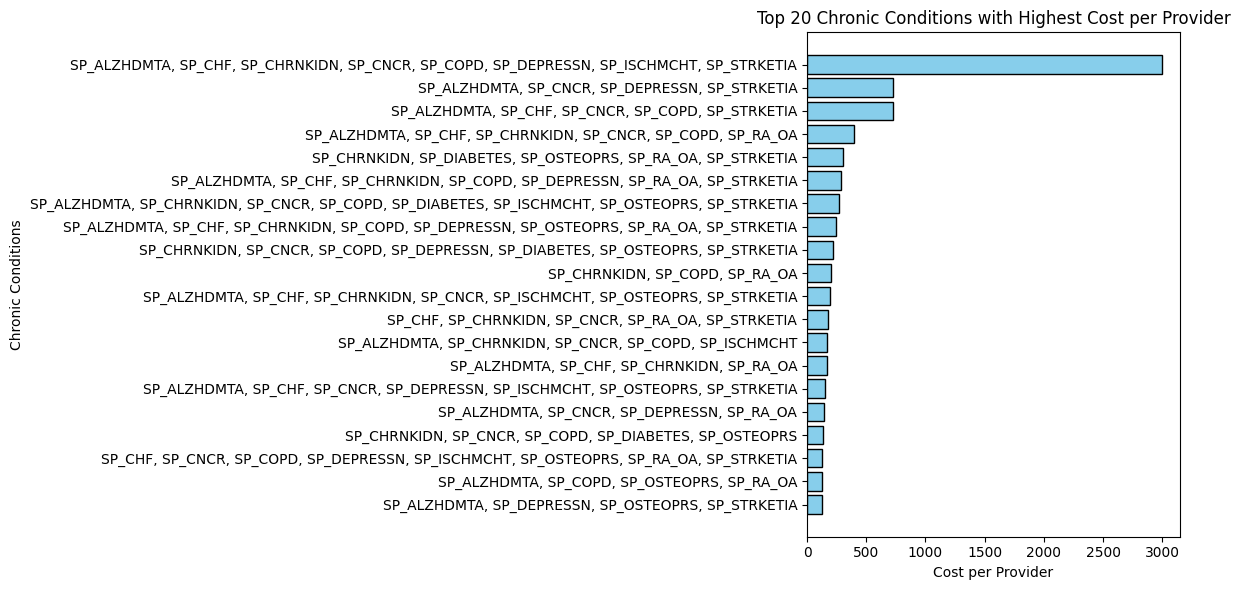

In [16]:
# Sort the DataFrame by 'Cost' in descending order and select the top 20 rows
top_20_combinations = cost_per_provider_pdf.sort_values(by='Cost_per_Provider', ascending=False).head(20)

# Create a bar chart for the top 20 conditions
plt.figure(figsize=(12, 6))
plt.barh(top_20_combinations['Chronic_Conditions'], top_20_combinations['Cost_per_Provider'], color='skyblue', edgecolor='black')
plt.xlabel('Cost per Provider')
plt.ylabel('Chronic Conditions')
plt.title('Top 20 Chronic Conditions with Highest Cost per Provider')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()

# Display the plot
plt.show()

In [17]:
# 3 - How does this change if we filter out cases where a given Chronic Illness & Provider NPI combination only has 1 member?

# unique_providers_pdf = filtered_pdf.groupby(['Chronic_Conditions'])['AT_PHYSN_NPI'].nunique().reset_index()

filtered_unique_providers_pdf = unique_providers_pdf[unique_providers_pdf['AT_PHYSN_NPI'] == 1]

cost_per_provider_pdf = total_pmt_pdf.merge(filtered_unique_providers_pdf, on='Chronic_Conditions', how='inner')

cost_per_provider_pdf['Cost_per_Provider'] = cost_per_provider_pdf['CLM_PMT_AMT'] / cost_per_provider_pdf['AT_PHYSN_NPI']

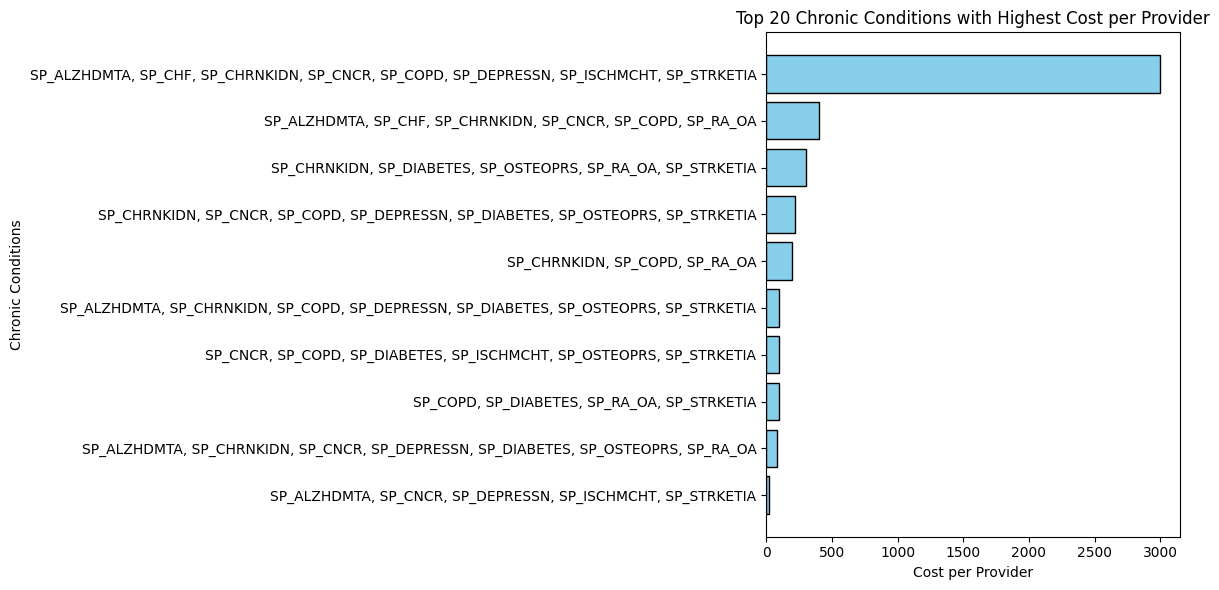

In [18]:
# Sort the DataFrame by 'Cost' in descending order and select the top 20 rows
top_20_combinations = cost_per_provider_pdf.sort_values(by='Cost_per_Provider', ascending=False)

# Create a bar chart for the top 20 conditions
plt.figure(figsize=(12, 6))
plt.barh(top_20_combinations['Chronic_Conditions'], top_20_combinations['Cost_per_Provider'], color='skyblue', edgecolor='black')
plt.xlabel('Cost per Provider')
plt.ylabel('Chronic Conditions')
plt.title('Top 20 Chronic Conditions with Highest Cost per Provider')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()

# Display the plot
plt.show()

In [19]:
# 4 - Which providers are consistently expensive across chronic illnesses they treat?

# Group by provider and get average payments
combination_totals = master_pdf[master_pdf['Chronic_Conditions'] != ''].groupby(['AT_PHYSN_NPI'])['CLM_PMT_AMT'].mean().reset_index()

In [20]:
top_10_providers = combination_totals.sort_values(by='CLM_PMT_AMT', ascending=False).head(10)
top_10_providers

,AT_PHYSN_NPI,CLM_PMT_AMT
17362,1.801059e+09,3300.0
12210,1.271934e+09,3300.0
83733,8.655698e+09,3300.0
29006,3.015790e+09,3300.0
17038,1.767139e+09,3300.0
24048,2.505081e+09,3300.0
70839,7.324185e+09,3300.0
6101,6.358177e+08,3300.0
58244,6.047787e+09,3300.0
6083,6.345455e+08,3300.0


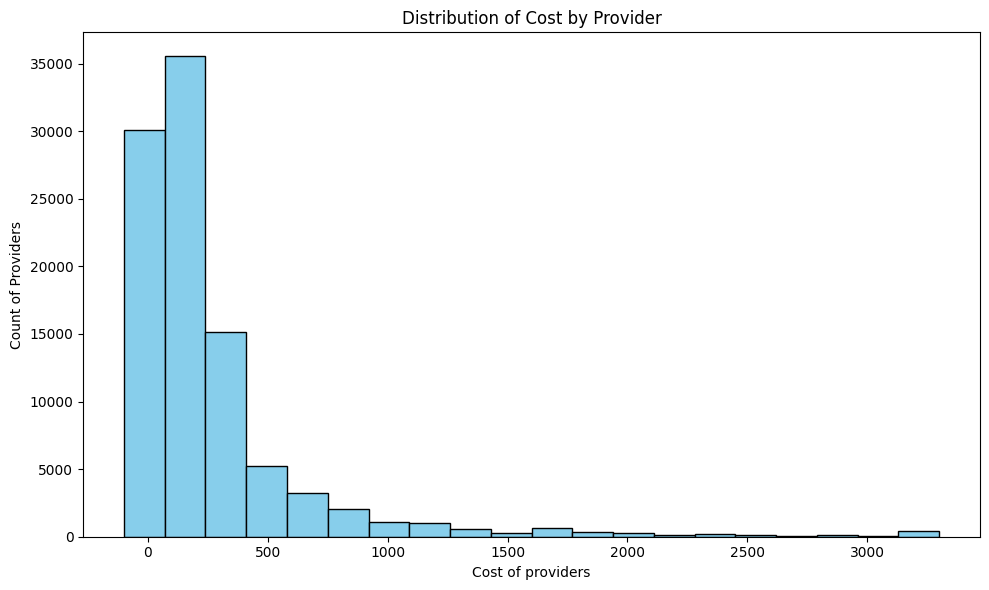

In [21]:
# Create a histogram of cost distribution
plt.figure(figsize=(10, 6))
plt.hist(combination_totals['CLM_PMT_AMT'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Cost of providers')
plt.ylabel('Count of Providers')
plt.title('Distribution of Cost by Provider')
plt.tight_layout()

# Display the plot
plt.show()

Majority of providers offer low cost services, but some are expensive!